# Introduction to scikit-learn
* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license
* Documentation: [http://scikit-learn.org/stable/documentation.html](http://scikit-learn.org/stable/documentation.html)

## installation
`$ pip install scikit-learn`

## Loading an example dataset

Scikit-learn comes with a few standard datasets, for instance the [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset for classification.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [2]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


![Sepal vs. Petal](images/sepal-petal.jpg)

In [3]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Data preparation
In order to be able to measure the performance of an estimator, we need to split the data into train and test data sets. Shuffling is not necessary.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
print('Train size: {}'.format(len(X_train)))
print('Test size: {}'.format(len(X_test)))

Train size: 135
Test size: 15


## Learning and predicting
In the case of the Iris dataset, the task is to predict, given a feature vector, which species the flower belong to. We are given samples of each of the 3 possible classes on which we fit an estimator to be able to predict the species to which unseen samples belong.

An example of an estimator is the class [sklearn.naive_bayes.GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) that implements Gaussian Naive Bayes classification.

In [6]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print(iris.target_names[clf.predict(X_test)])

['versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [7]:
print(clf.predict_proba(X_test))

[[2.27163866e-068 9.99981212e-001 1.87881178e-005]
 [1.74945680e-071 9.99850434e-001 1.49565742e-004]
 [1.70319013e-121 9.64657651e-001 3.53423494e-002]
 [4.24755137e-264 6.27385567e-010 9.99999999e-001]
 [4.31767333e-111 5.82412193e-001 4.17587807e-001]
 [6.68822901e-244 9.20228514e-010 9.99999999e-001]
 [9.67483925e-087 9.99515402e-001 4.84598300e-004]
 [4.61897805e-082 9.98322250e-001 1.67775033e-003]
 [6.01144636e-034 9.99999949e-001 5.05442080e-008]
 [1.00000000e+000 4.46473110e-017 3.14183462e-026]
 [1.92163491e-069 9.99818257e-001 1.81742577e-004]
 [1.35014151e-100 8.42686645e-001 1.57313355e-001]
 [1.72304204e-094 9.97910886e-001 2.08911378e-003]
 [1.84611308e-117 9.22291506e-001 7.77084943e-002]
 [1.00000000e+000 4.75041982e-017 4.67518918e-027]]


## Model persistence
It is possible to save a model in Scikit-learn by using Python’s built-in persistence model, namely [pickle](https://docs.python.org/2/library/pickle.html):

In [8]:
import pickle

with open('/tmp/model.pkl', 'wb') as f:
    pickle.dump(clf, f)
    
with open('/tmp/model.pkl', 'rb') as f:
    clf2 = pickle.load(f)
    print(iris.target_names[clf2.predict(X_test)])

['versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa']


## Model evaluation
Scikit-learn provides implementation of all methods you need.

In [9]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print ("Test accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print ()
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

Test accuracy: 0.93

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         2
 versicolor       0.91      1.00      0.95        10
  virginica       1.00      0.67      0.80         3

avg / total       0.94      0.93      0.93        15



In [10]:
y_pred = clf.predict(X_train)

print ("Train accuracy: {:.2f}".format(accuracy_score(y_train, y_pred)))
print ()
print(metrics.classification_report(y_train, y_pred, target_names=iris.target_names))

Train accuracy: 0.96

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        48
 versicolor       0.95      0.93      0.94        40
  virginica       0.94      0.96      0.95        47

avg / total       0.96      0.96      0.96       135



In [11]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 2  0  0]
 [ 0 10  0]
 [ 0  1  2]]


In [12]:
from sklearn.model_selection import cross_val_score

folds = 10
acccuracies = cross_val_score(clf, iris.data, iris.target, cv=folds, scoring='accuracy')
print('Cross-validated accuracy: {:.2f} with standard deviation {:.2f}'.format(acccuracies.mean(), acccuracies.std()))

Cross-validated accuracy: 0.95 with standard deviation 0.04


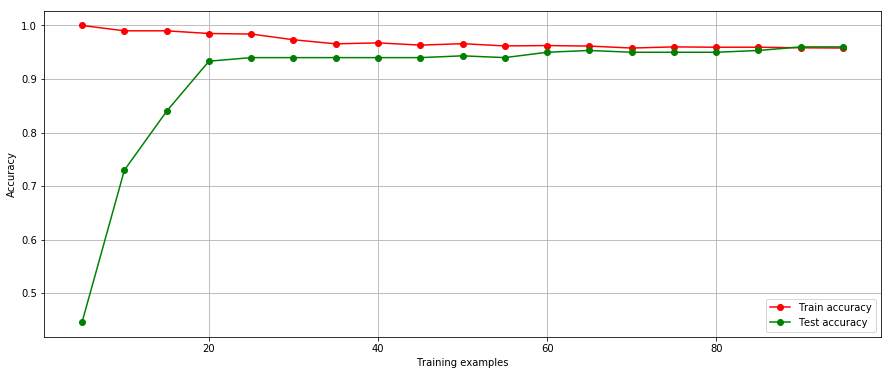

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit

cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)

train_sizes, train_scores, test_scores = learning_curve(
    clf,
    iris.data, iris.target,
    train_sizes=range(5,99,5),
    n_jobs=-1,
    cv=cv,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#train_scores_std = np.std(train_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)
#plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                     train_scores_mean + train_scores_std, alpha=0.1,
#                     color="r")
#plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.figure(figsize=(15,6))

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test accuracy")

plt.xlabel("Training examples")

plt.ylabel("Accuracy")

plt.grid()

plt.legend(loc="lower right")

plt.show()